In [1]:
import numpy as np
import math
import scipy as scp
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd

# Q1

### 1)

In [2]:

def Q1_1(Asset_Value=100, Debt_Value=80, T=20, r=0.031, Volatility_1=0.15, Volatility_2=0.25, N=5040, paths=5):

    
    np.random.seed(0)
    
    dt = T/(N)          # time interval
    df = np.exp(-r * dt)  # discount factor per time time interval

    X0 = np.zeros((paths,1))
    increments_1 = ss.norm.rvs(loc=(r - Volatility_1**2/2)*dt, scale=np.sqrt(dt)*Volatility_1, size=(paths,int(N/2)))
    increments_2 = ss.norm.rvs(loc=(r - Volatility_2**2/2)*dt, scale=np.sqrt(dt)*Volatility_2, size=(paths,int(N/2)))
    X = np.concatenate((X0,increments_1, increments_2), axis=1).cumsum(1)
    A = Asset_Value * np.exp(X)
    
    dt_array = np.concatenate((0, np.array(N*[dt])), axis=None).cumsum()
    
    for i in np.arange(np.shape(A)[0]):
        plt.plot(dt_array, A[i])
        
    plt.show()

    return A[:,-1]
    # return("Equity", A_T[-1] - Debt_Value)






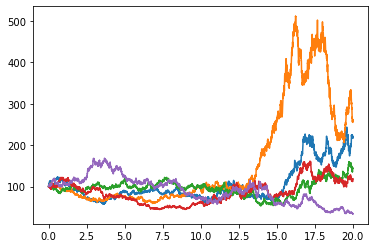

array([220.87401444, 258.62456041, 144.73840758, 118.58170687,
        34.31593205])

In [3]:
Q1_1()

### 2) & 3)

In [17]:

def Q1_23(Asset_Value=100, Debt_Value=80, T=20, r=0.031, Volatility_1=0.15, Volatility_2=0.25, N=5040, paths=10000):


    np.random.seed(0)
    
    dt = T/(N)          # time interval
    df = np.exp(-r * dt)  # discount factor per time time interval

    X0 = np.zeros((paths,1))
    increments_1 = ss.norm.rvs(loc=(r - Volatility_1**2/2)*dt, scale=np.sqrt(dt)*Volatility_1, size=(paths,int(N/2)))
    increments_2 = ss.norm.rvs(loc=(r - Volatility_2**2/2)*dt, scale=np.sqrt(dt)*Volatility_2, size=(paths,int(N/2)))
    X = np.concatenate((X0,increments_1, increments_2), axis=1).cumsum(1)
    A = Asset_Value * np.exp(X)
    
    dt_array = np.concatenate((0, np.array(N*[dt])), axis=None).cumsum()
    
    residual = A[:,-1] - Debt_Value
    Default_Probability = np.sum(A[:,-1] < Debt_Value)/paths
    
    for i in np.arange(np.shape(A)[0]):
        plt.plot(dt_array, A[i])
        
    plt.show()
    
    plt.hist(residual,bins = 100)
    
    

    return("Default Probability = ", Default_Probability)






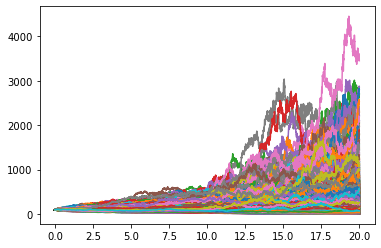

('Default Probability = ', 0.3263)

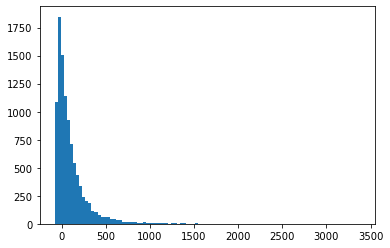

In [18]:
Q1_23()

### 4)

In [14]:
A = 100
D = 80
r = 0.031
sig_1 = 0.15
sig_2 = 0.25
T = 10



prob = ss.norm.cdf(-(np.log(A/D) + (2*r - 1/2 * sig_1**2 - 1/2 * sig_2**2)*T)/((sig_1+sig_2)*np.sqrt(T)))

print("Analytical Default Probability = ", prob)

Analytical Default Probability =  0.3704840872984083


For the analytical default probability under the risk neutral measure, we got default probability = 37.05% <br>
For the simulation result to the analytical default probability for model 1, we got default probability = 32.63%

### 5)

In [331]:

def Q1_5(Asset_Value=100, Debt_Value=80, T=20, r=0.031, Volatility_1=0.15, Volatility_2=0.25, barrier=50, N=5040, paths=10000):


    np.random.seed(0)
    
    dt = T/(N)          # time interval
    df = np.exp(-r * dt)  # discount factor per time time interval

    X0 = np.zeros((paths,1))
    increments_1 = ss.norm.rvs(loc=(r - Volatility_1**2/2)*dt, scale=np.sqrt(dt)*Volatility_1, size=(paths,int(N/2)))
    increments_2 = ss.norm.rvs(loc=(r - Volatility_2**2/2)*dt, scale=np.sqrt(dt)*Volatility_2, size=(paths,int(N/2)))
    X = np.concatenate((X0,increments_1, increments_2), axis=1).cumsum(1)
    A = Asset_Value * np.exp(X)
    
    
    tem = np.concatenate((0, np.array(N*[-r * dt])), axis=None).cumsum()
    barrier_array = barrier*np.exp(tem)[::-1]
    
    dt_array = np.concatenate((0, np.array(N*[dt])), axis=None).cumsum()
    
    knock_out = np.zeros(paths)
    
    for i in np.arange(np.shape(A)[0]):
        for j in np.arange(np.shape(A)[1]):
            if A[i,j] < barrier_array[j]:
                knock_out[i] = 1
                
    Equity_Value = np.zeros(paths)  
            
    for i in np.arange(paths):
        if knock_out[i] == 1:
            Equity_Value[i] = 0
            
        elif A[i,-1] < Debt_Value:
            Equity_Value[i] = 0
            
        else:
            Equity_Value[i] = A[i,-1] - Debt_Value
    
    
    residual = A[:,-1] - Debt_Value
    
    Default_Probability = np.sum(Equity_Value == 0)/paths
    
    for i in np.arange(np.shape(A)[0]):
        plt.plot(dt_array, A[i])
        
    plt.plot(dt_array, barrier_array, alpha=1, linewidth=4, color='k', linestyle='--')
    plt.show()
    
    plt.hist(residual,bins = 100)
    
    

    return("Default Probability = ", Default_Probability)






Set the barrier at maturity to 50, and took into account the discount factor to
obtain the default threshold before maturity

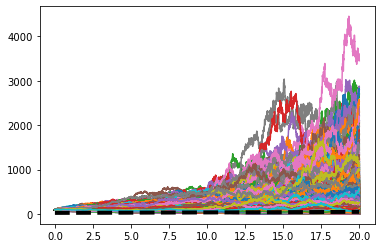

('Default Probability = ', 0.3563)

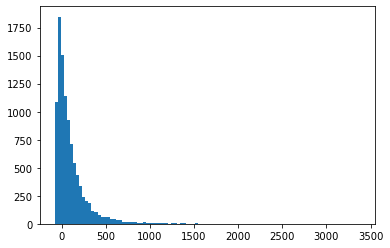

In [332]:
Q1_5()

6)

Model 1 is Merton Model <br>
Model 2 is Black-Cox Model

With the same simulation path (Same randon seed): <br>
The simulation default probabilities assuming model 1 = 32.63% <br>
The simulation default probabilities assuming model 2 = 35.63%

The default probabilities assuming model 2 is 3% higher than assuming model 1, becasue the default will be happen at
any time up to maturity whenever the asset value drop below a predetermined threshold. As a result, if the asset value drop below a  threshold at anytime before maturity, the firm will default immediately even the asset price may rise higher than the debt payable at maturity. Therefore, The default probabilities assuming model 2 will always be higher than assuming model 1. 

In this case the different is not significant at only 3%, because the barrier threshold is set very low at 50.


# Q2

In [350]:
class Option_param():
    """
    Option class wants the option parameters:
    S0 = current stock price
    K = Strike price
    T = time to maturity
    
    """
    def __init__(self, A=120, D=95, T=10, payoff="Bond"):
        self.A = A
        self.D = D
        self.T = T
        self.payoff = payoff



In [351]:
class Diffusion_process():
    """
    Class for the diffusion process:
    r = continuously compounded risk-free interest rate (% p.a.)
    sig = volatility (% p.a.)
    """
    def __init__(self, r=0.09, theta=0.05, k=0.3, sigma_r=0.03, sigma_a=0.18, p=0, lambda_r=0):
        self.r = r
        self.theta = theta
        self.k = k
        self.sigma_r = sigma_r
        self.sigma_a = sigma_a
        self.p = p
        self.lambda_r = lambda_r
        


In [352]:
class Equity_and_Bond_pricer():
    
    def __init__(self, Option_info, Process_info):
        """
        Option_info:  of type Option_param. It contains (A,D,T) i.e. current price, strike, maturity in years
        Process_info:  of type Diffusion_process. It contains (r,mu, sigma_a, sigma_r, ) i.e.  interest rate, drift coefficient, diffusion coefficient
        """
        
        # Option_info:
        self.r = Process_info.r           # interest rate
        self.theta = Process_info.theta
        self.k = Process_info.k
        self.sigma_r = Process_info.sigma_r
        self.sigma_a = Process_info.sigma_a       # diffusion coefficient
        self.p = Process_info.p
        self.lambda_r = Process_info.lambda_r
        
        # Process_info:
        self.A = Option_info.A          # current asset price
        self.D = Option_info.D            # strike
        self.T = Option_info.T            # maturity in years
        self.payoff = Option_info.payoff
    
    
    
    
    

        
    
    
    def Black_Scholes(self):
        """ Black Scholes closed formula:
            payoff: Equity or Bond.
            A: float.    initial Asset level.
            D: float strike price.
            T: float maturity (in year fractions).  
            r: float constant risk-free short rate.
            sigma: volatility factor in diffusion term. """
   
        d1 = (np.log(self.A/self.D) + (self.r + self.sigma_a**2 / 2) * self.T) / (self.sigma_a * np.sqrt(self.T))
        d2 = (np.log(self.A/self.D) + (self.r - self.sigma_a**2 / 2) * self.T) / (self.sigma_a * np.sqrt(self.T))
        
        Equity = self.A * ss.norm.cdf( d1 ) - self.D * np.exp(-self.r * self.T) * ss.norm.cdf( d2 )
        Bond = self.A - (self.A * ss.norm.cdf( d1 ) - self.D * np.exp(-self.r * self.T) * ss.norm.cdf( d2 ))

        if self.payoff=='Equity':
            return ("Equity = ", Equity)
        elif self.payoff=='Defaultable Bond':
            return ("Defaultable Bond = ", Bond, "Yield = ", -1/self.T*np.log(Bond/self.D))
        else:
            raise ValueError("invalid type. Set 'Equity' or 'Defaultable Bond'")
            

            
            
    def Black_Scholes_with_Stochastic_Interest_Rates(self):
        """ Black Scholes closed formula:
            payoff: Equity or Bond.
            A: float.    initial Asset level.
            D: float strike price.
            T: float maturity (in year fractions).  
            r: float constant risk-free short rate.
            sigma: volatility factor in diffusion term. """
        
        
        B = 1/self.k * (1 - np.exp(-self.k*self.T))
        A = (self.theta - self.lambda_r*self.sigma_r/self.k - 1/2*(self.sigma_r/self.k)**2) * (self.T - B) \
                + (self.sigma_r**2)/(4*self.k) * B**2
        
        risk_free_bond_price = np.exp(-A - B*self.r)
        
        
        total_variance = self.sigma_a**2 * self.T + \
                    (self.sigma_r**2/self.k**3) * (self.k*self.T + (1 - np.exp(-2 * self.k * self.T))/2 - 2 * (1 - np.exp(-self.k * self.T))) \
                    + 2 * self.p * self.sigma_a * self.sigma_r/self.k**2 * (self.k * self.T - (1 - np.exp(-self.k * self.T)))

        total_volatility = np.sqrt(total_variance)
   
        h1 = (np.log(self.A/(risk_free_bond_price*self.D)) + 1/2 * total_volatility**2)/total_volatility
        h2 = h1 - total_volatility
        
        Equity = self.A * ss.norm.cdf(h1) - risk_free_bond_price * self.D * ss.norm.cdf(h2)
        Bond = self.A - Equity

        if self.payoff=='Equity':
            return ("Equity = ", Equity)
        
        elif self.payoff=='Defaultable Bond':
            return ("Defaultable Bond = ", Bond, "Yield = ", -1/self.T*np.log(Bond/self.D))
        elif self.payoff=='Risk-Free Bond':
            return ("Risk-Free Bond = ", risk_free_bond_price, "Yield = ", -1/self.T*np.log(risk_free_bond_price/1))
        else:
            raise ValueError("invalid type. Set 'Equity' or 'Defaultable Bond' or 'Risk-Free Bond' ")
          
        
   

### (1)

In [353]:
Table_1 = np.zeros((20, 4),dtype=int)

# Option parameter
A = np.array([80,90,125,180])
D = 95
T = np.arange(0.5, 10.5, 0.5)

# Diffusion process parameter
r = 0.028
sigma_a = 0.23


In [354]:
for i, t in enumerate(T):
    for j, a in enumerate(A):
        
        opt_param = Option_param(A=a, D=D, T=t, payoff="Defaultable Bond")
        diff_param = Diffusion_process(r=r, sigma_a=sigma_a)
        Defaultable_Bond = Equity_and_Bond_pricer(opt_param, diff_param)

        credit_spread = (Defaultable_Bond.Black_Scholes()[3] - r)*10000
        Table_1[i,j] = math.ceil(credit_spread)
        
        



In [355]:
df = pd.DataFrame(Table_1, columns=A, index=T)
df

,80,90,125,180
0.5,3469,1779,58,1
1.0,1846,1097,119,2
1.5,1299,833,145,7
2.0,1020,687,157,14
2.5,848,592,161,20
3.0,731,525,162,26
3.5,646,474,161,32
4.0,581,433,159,36
4.5,529,401,157,40
5.0,487,373,154,43


### (2)

In [356]:
Table_2 = np.zeros((20, 2),dtype=int)

# Option parameter
A = 120
D = 95
T = np.arange(0.5, 10.5, 0.5)

# Diffusion process parameter
r = np.array([0.03, 0.09])
sigma_a = 0.18


In [357]:
for i, t in enumerate(T):
    for j, rate in enumerate(r):
        
        opt_param = Option_param(A=A, D=D, T=t, payoff="Defaultable Bond")
        diff_param = Diffusion_process(r=rate, sigma_a=sigma_a)
        Defaultable_Bond = Equity_and_Bond_pricer(opt_param, diff_param)

        credit_spread = (Defaultable_Bond.Black_Scholes()[3] - rate)*10000
        Table_2[i,j] = math.ceil(credit_spread)
        
        



In [359]:
df = pd.DataFrame(Table_2, columns=r, index=T)
df

,0.03,0.09
0.5,28,15
1.0,66,31
1.5,84,35
2.0,92,35
2.5,95,33
3.0,96,30
3.5,95,28
4.0,94,25
4.5,92,23
5.0,90,21


### (3)

# Q3

In [360]:
Table_1 = np.zeros((20, 4),dtype=int)

# Option parameter
A = np.array([80,90,125,180])
D = 95
T = np.arange(0.5, 10.5, 0.5)

# Diffusion process parameter
r = 0.028
theta = 0.05
k = 0.3
sigma_r = 0.03
sigma_a = 0.23
p = 0
lambda_r = 0

In [361]:
for i, t in enumerate(T):
    for j, a in enumerate(A):
        
        # Creates the Defaultable Bond
        opt_param = Option_param(A=a, D=D, T=t, payoff="Defaultable Bond")
        diff_param = Diffusion_process(r=r, theta=theta, k=k, sigma_r=sigma_r, sigma_a=sigma_a, p=p, lambda_r=lambda_r)
        Defaultable_Bond = Equity_and_Bond_pricer(opt_param, diff_param)

        # Creates the risk-Free Bond
        opt_param = Option_param(A=a, D=D, T=t, payoff="Risk-Free Bond")
        diff_param = Diffusion_process(r=r, theta=theta, k=k, sigma_r=sigma_r, sigma_a=sigma_a, p=p, lambda_r=lambda_r)
        Risk_Free_Bond = Equity_and_Bond_pricer(opt_param, diff_param)
        
        
        
        credit_spread = (Defaultable_Bond.Black_Scholes_with_Stochastic_Interest_Rates()[3] - Risk_Free_Bond.Black_Scholes_with_Stochastic_Interest_Rates()[3])*10000
        Table_1[i,j] = math.ceil(credit_spread)
        
        



In [363]:
df = pd.DataFrame(Table_1, columns=A, index=T)
df

,80,90,125,180
0.5,3457,1771,57,1
1.0,1827,1083,117,2
1.5,1276,816,142,7
2.0,993,668,152,13
2.5,820,571,155,20
3.0,701,502,154,25
3.5,615,449,152,30
4.0,548,408,150,34
4.5,496,375,146,38
5.0,453,347,143,40


In [365]:
Table_2 = np.zeros((20, 2),dtype=int)

# Option parameter
A = 120
D = 95
T = np.arange(0.5, 10.5, 0.5)

# Diffusion process parameter
r = np.array([0.03, 0.09])
theta = 0.05
k = 0.3
sigma_r = 0.03
sigma_a = 0.18
p = 0
lambda_r = 0


In [366]:
for i, t in enumerate(T):
    for j, rate in enumerate(r):
        
        # Creates the Defaultable Bond
        opt_param = Option_param(A=A, D=D, T=t, payoff="Defaultable Bond")
        diff_param = Diffusion_process(r=rate, theta=theta, k=k, sigma_r=sigma_r, sigma_a=sigma_a, p=p, lambda_r=lambda_r)
        Defaultable_Bond = Equity_and_Bond_pricer(opt_param, diff_param)

        # Creates the risk-Free Bond
        opt_param = Option_param(A=A, D=D, T=t, payoff="Risk-Free Bond")
        diff_param = Diffusion_process(r=rate, theta=theta, k=k, sigma_r=sigma_r, sigma_a=sigma_a, p=p, lambda_r=lambda_r)
        Risk_Free_Bond = Equity_and_Bond_pricer(opt_param, diff_param)
        
        
        
        credit_spread = (Defaultable_Bond.Black_Scholes_with_Stochastic_Interest_Rates()[3] - Risk_Free_Bond.Black_Scholes_with_Stochastic_Interest_Rates()[3])*10000
        Table_2[i,j] = math.ceil(credit_spread)
        
        



In [367]:
df = pd.DataFrame(Table_2, columns=r, index=T)
df

,0.03,0.09
0.5,28,16
1.0,65,34
1.5,82,41
2.0,89,44
2.5,92,45
3.0,92,45
3.5,91,44
4.0,90,44
4.5,88,44
5.0,86,43


Question
1) In a few paragraphs discuss the main empirical failings of the benchmark Merton model.
2) discuss how the extension to the Merton model given by equations 2-3  can resolve these failings
3) and discusses the economic mechanism of the model with equations and derivations

## 

Answer
1) The main empirical failing of the benchmark Merton model is that the assumption of constant interest short rate violates the real market observation of interest rate, which is empirically a mean-reversing non-constant rate. The failings lead to severe mispricing of assets, both equity and bond. This failing can be resolved with  Merton Model with Stochastic Interest Rates.Another failing is that the debt is assumed to able to debt only at matury while in real-life the debt can be default before the maturity if the asset value fall below a predetermined threshold, and this failing can be solve with a black-Cox Model. 

2) The interest short rate observed empirically in the market is a mean-reversion diffusion process like a Vasicek or CIR process. The dynamic of the interest rate is essential when we price a risk-free bond, while the price of a risk-free bond is needed for pricing a defaultable bond. 

    The diffusion process of interest rate is correlated to the diffusion of asset price that both “the volatility of the interest rate” and “the correlation between the interest rate and asset price” would affect the total variance of A/PD. The total variance is the implied volatility in the Black-Scholes equation when pricing equity as long as a call option, bond as a risk-free bond and short as a put option. 

    Therefore, defining the dynamics of the interest rate as a Vasicek process in Equation 3, and the correlation of the diffusion process in Equation 4 is crucial when we price a bond. With Equation 3 and 4, it can resolve the failings that lead to severe mispricing of assets.
    
    We can compare the credit spread with 1) Merton Model and 2) Merton Model with mean-reverse stochastic interest rates, from table 2 that has a interest at 9% and the long-term interest rate mean at 5%. For Merton Model, We can observe that the credit spread is negatively correlated to the time to maturity, because the draft of asset value is very high at 9% that even with volatility the asset value will have higher chance to be larger than the debt payable if enough time to maturity is given. On the other hand for Merton Model with mean-reverse stochastic interest rates, We can observe that the credit spread is positive correlated to the time to maturity, because the 9% interest rate draft for asset price could not be sustain and will eventually reverse to the long-term mean 5% if enough time to maturity is given. As a result for a larger time to matury, the long-term 5% interest rate do not provide enough draft to overcome the larger volatility due to the larger time to matury. Therefore, the credit spread is positive correlated to the time to maturity for stochastic interest rate model in this setting. All in all, we can conclude that with the equation 3 & 4 defined the mean-reverse dynamic and the correlation between asset price and interest rate, the main failings of Merton Model can be resolved.
    

3) The economic mechanism for the non-constant interest rate is that the central bank increases the interest short rate to reduce the inflation to cool down the overheated economy while decreasing the interest short rate to encourage corporate financing and reduce the cost of capital to boost the economy. This economic mechanism of using interest rate as a tool to stimulate and cool the economy is implied by the mean-reversion process of interest rate.